 `(Mohammad Reza Amiri 9926040)`
 `(Amir Hossein Ahmadi Ashtiani 9923501)`
 `(Mohammad Mahdi Norouzi 9923085)`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn.functional as F

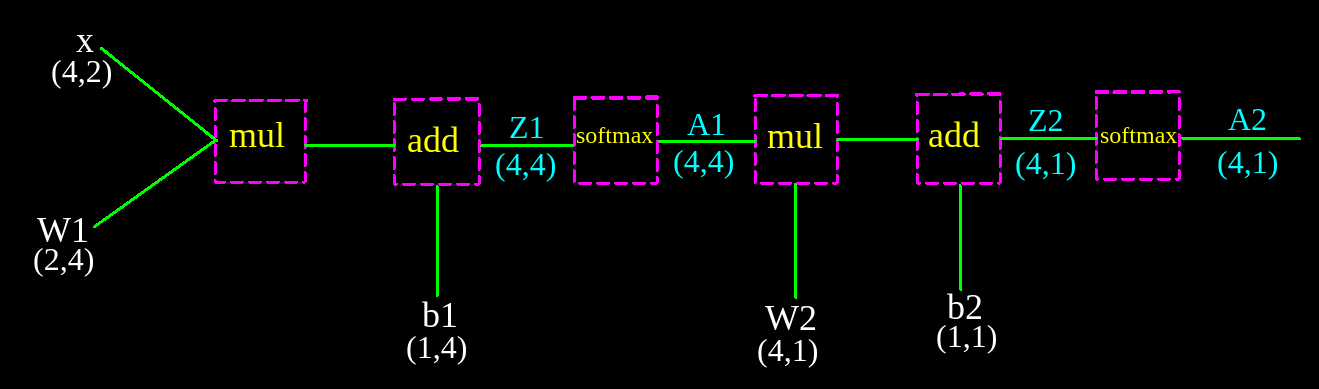

### 1. Gradient for the second layer (output layer):

$$
dZ_2 = (A_2 - Y) \odot \sigma'(Z_2)
$$

$$
dW_2 = \frac{1}{m} A_1^T \cdot dZ_2
$$

$$
db_2 = \frac{1}{m} \sum_{i=1}^{m} dZ_2^{(i)}
$$

### 2. Gradient for the first layer (hidden layer):

$$
dA_1 = dZ_2 \cdot W_2^T
$$

$$
dZ_1 = dA_1 \odot \sigma'(Z_1)
$$

$$
dW_1 = \frac{1}{m} X^T \cdot dZ_1
$$

$$
db_1 = \frac{1}{m} \sum_{i=1}^{m} dZ_1^{(i)}
$$

### 3. Updating weights and biases:

$$
W_1 = W_1 - \eta dW_1
$$

$$
b_1 = b_1 - \eta db_1
$$

$$
W_2 = W_2 - \eta dW_2
$$

$$
b_2 = b_2 - \eta db_2
$$


In [2]:
class deepNetwork:
    def __init__(self, input_size, hidden_size, output_size, typ='classify', learning_rate=0.01):
        # Initialize weights and biases for the first and second layer
        self.W1 = np.random.uniform(size=(input_size, hidden_size))
        self.b1 = np.random.uniform(size=(1, hidden_size))
        self.W2 = np.random.uniform(size=(hidden_size, output_size))
        self.b2 = np.random.uniform(size=(1, output_size))
        self.lr = learning_rate
        self.type = typ
        print(self.W1)
    
    def sigmoid(self, Z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-Z))
    
    def sigmoid_derivative(self, Z):
        # Derivative of sigmoid function
        sig = self.sigmoid(Z)
        return sig * (1 - sig)
    
    def relu(self, Z):
        # ReLU activation function
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        # Derivative of ReLU function
        return np.where(Z > 0, 1, 0)

    def forward(self, X):
        if self.type == 'classify':
            self.Z1 = np.dot(X, self.W1) + self.b1 
            self.A1 = self.sigmoid(self.Z1)
            self.Z2 = np.dot(self.A1, self.W2) + self.b2 
            self.A2 = self.sigmoid(self.Z2)
            return self.A2
        elif self.type == 'regg':
            self.Z1 = np.dot(X, self.W1) + self.b1 
            self.A1 = self.relu(self.Z1)
            self.Z2 = np.dot(self.A1, self.W2) + self.b2  
            return self.Z2 
    
    def compute_loss(self, Y, Y_hat):
        # Compute the Mean Squared Error loss
        m = Y.shape[0]
        return (1 / m) * np.sum((Y_hat - Y) ** 2)
    
    def backward(self, X, Y):
        # Backward propagation to compute gradients for weight updates
        m = Y.shape[0]
        
        # Compute the gradients for the second layer
        dZ2 = (self.forward(X) - Y) / m
        if self.type == "classify":
            dZ2 *= self.sigmoid_derivative(self.Z2) 
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        
        # Compute the gradients for the first layer
        dA1 = np.dot(dZ2, self.W2.T)
        if self.type == 'classify':
            dZ1 = dA1 * self.sigmoid_derivative(self.Z1)
        else:
            dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        
        # Update the weights and biases for both layers
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
    
    def predict(self, X):
        # Predict using the forward pass
        if self.type == 'classify':
            A2 = self.forward(X)
            return np.round(A2)
        else:
            return self.forward(X)


In [3]:
# Plotting the loss and accuracy after training
def plot_loss(loss, train_accuracies=None, test_accuracies=None):
    epochs = range(len(loss))
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Display plots
    plt.tight_layout()
    plt.show()

In [4]:
def train1(nn, X, Y, epochs=1000):
    # Training the network using forward and backward propagation
    loss = []
    for epoch in range(epochs):
        # Forward pass
        Y_hat = nn.forward(X)

        # Compute the loss
        loss.append(nn.compute_loss(Y, Y_hat))
        # print(nn.W1)
        
        # Backward pass
        nn.backward(X, Y)
    plot_loss(loss)

[[0.37251598 0.00316332 0.8554789  0.69833634]
 [0.19744946 0.72047034 0.15615583 0.46859887]
 [0.21765897 0.80478734 0.36284465 0.36992603]]


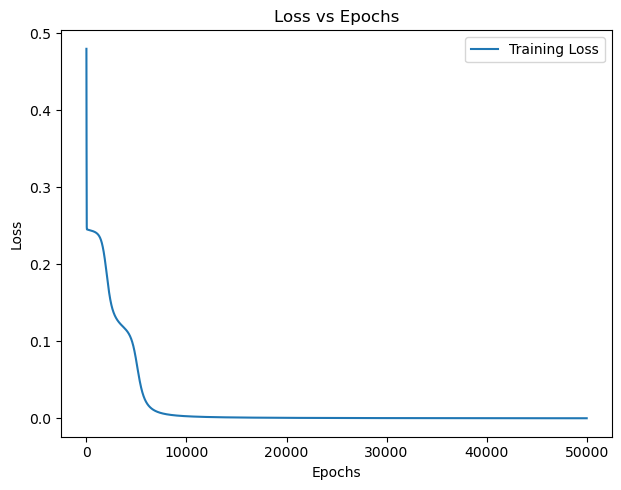

y_pred: 1.0       y_true: 1
y_pred: 1.0       y_true: 1
y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 0
y_pred: 1.0       y_true: 1
y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 1


In [5]:
# Example data (X: input, Y: target)
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
Y = np.array([[1],[0],[0],[1],[0],[1],[1],[0]])

data = np.concatenate((X, Y), axis=1)
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1].reshape(-1, 1)

# Initialize and train the network
nn = deepNetwork(input_size=3, hidden_size=4, output_size=1,typ='classify', learning_rate=0.5)
train1(nn, X[:-1], Y[:-1], epochs=50000)


for i in range(8):
    print(f'y_pred: {nn.predict(X[i])[0][0]}       y_true: {Y[i][0]}')

### Data Augmentation

[[0.32158516 0.2254698  0.29908804 0.3946514 ]
 [0.15370234 0.79928269 0.34779261 0.44259249]
 [0.65407702 0.63253747 0.96206249 0.20158786]]


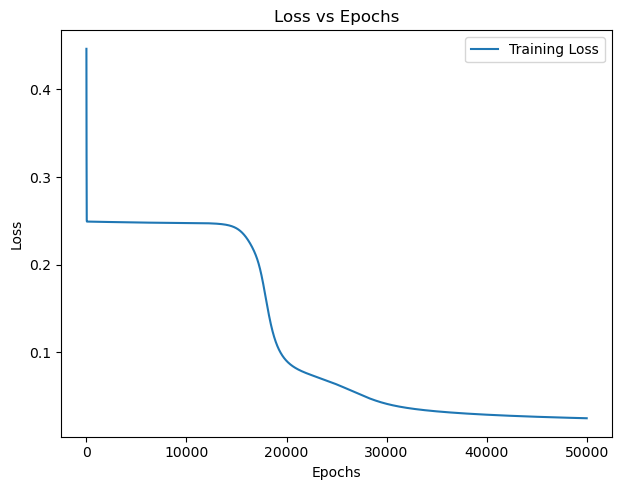

accuracy: 0.97


In [6]:
num_new_samples = 800

# Function to create synthetic data
def generate_synthetic_data(X, Y, num_new_samples):
    synthetic_X = []
    synthetic_Y = []
    
    # Generate new data points by adding random small variations to the existing data
    for _ in range(num_new_samples):
        # Randomly choose an existing data point
        idx = np.random.randint(0, X.shape[0])
        original_x = X[idx]
        original_y = Y[idx]

        # Create a new data point by adding small random variations
        new_x = original_x + np.random.uniform(-0.5, 0.5, size=original_x.shape)
        
        # Ensure the values are clipped between 0 and 1 (as XOR inputs are binary)
        new_x = np.clip(new_x, 0, 1)
        
        synthetic_X.append(new_x)
        synthetic_Y.append(original_y)
    
    return np.array(synthetic_X), np.array(synthetic_Y)

# Generate new synthetic data
synthetic_X, synthetic_Y = generate_synthetic_data(X, Y, num_new_samples)

# Combine the original and synthetic data
X_augmented = np.vstack([X, synthetic_X])
Y_augmented = np.vstack([Y, synthetic_Y])

# Shuffle the augmented dataset
data = np.concatenate((X_augmented, Y_augmented), axis=1)
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1].reshape(-1, 1)

# Initialize and train the network
nn = deepNetwork(input_size=3, hidden_size=4, output_size=1, learning_rate=0.6)
train1(nn, X[:-100], Y[:-100], epochs=50000)

# Predictions
correct = 0
for i in range(1,100):
    y_pred = nn.predict(X[-i])[0][0]
    if y_pred == Y[-i][0]:
        correct += 1
print(f"accuracy: {correct/100}")

# Practice

## 1

<div dir="rtl">
با توجه به صحبت‌های کلاس، پیاده سازی کد در پایتون کافی است.
</div>

## 2

In [7]:
# Load the dataset
california_housing = fetch_california_housing()

# Convert it to a DataFrame for easier inspection
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Display the first few rows of the dataset
print(df.head())

# Get the list of feature names
print(df.columns)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [8]:
# Fetch the data
housing = fetch_california_housing()
X = housing.data  # features
y = housing.target  # target prices (regression problem)

# Segment the target prices into 5 bins (classes)
num_bins = 5
y_binned = pd.cut(y, bins=num_bins, labels=[0, 1, 2, 3, 4])
y_binned = y_binned.to_numpy()

# Normalize the input features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y_binned, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

# One-hot encode the target values
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val = encoder.transform(np.array(y_val).reshape(-1, 1))

# Show a sample of the normalized input data and one-hot encoded target values
print(f"Sample of normalized input data: \n{X_normalized[:5]}")
print(f"Sample of one-hot encoded target values for training: \n{y_train[:5]}")
print(f"Sample of one-hot encoded target values for testing: \n{y_test[:5]}")

Sample of normalized input data: 
[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]
Sample of one-hot encoded target values for training: 
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Sample of one-hot encoded target values for testing: 
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [9]:
def sample_batch(X, y, num_train, batch_size):
    """
    Sample batch_size elements from the training data and their
    corresponding labels to use in this round of gradient descent.
    """
    # Replace "pass" statement with your code
    indices = np.random.randint(0, num_train, (batch_size,))
    X_batch = X[indices, :]
    y_batch = y[indices]
    return X_batch, y_batch

def plot_training_history(epochs, loss_hist, train_acc_history, val_acc_history):
    """
    Plot the training history including loss and accuracy over epochs.
    
    Parameters:
    - epochs: The number of training epochs (integer).
    - loss_hist: List of loss values for each epoch.
    - train_acc_history: List of training accuracy values for each epoch.
    - val_acc_history: List of validation accuracy values for each epoch.
    """
    ep = range(epochs)
    
    plt.figure(figsize=(12, 6))
    
    # Plot loss history
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(ep, loss_hist, color='red', label='Training Loss')
    plt.title('Loss Over Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True)
    plt.legend(loc='best')
    
    # Plot accuracy history
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(ep, train_acc_history, color='blue', label='Training Accuracy')
    plt.plot(ep, val_acc_history, color='green', label='Validation Accuracy')
    plt.title('Accuracy Over Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.legend(loc='best')
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

[[0.45699333 0.15442122 0.18143432 0.61227694 0.14205803 0.34862713
  0.39132679 0.24386936 0.00420593 0.61329227]
 [0.04587271 0.25998496 0.42079385 0.12306959 0.57067427 0.86623909
  0.82422781 0.93142341 0.90962936 0.86114315]
 [0.37475831 0.80189634 0.15278543 0.70357612 0.68317667 0.28409862
  0.5138102  0.19841835 0.38018059 0.81177988]
 [0.63303801 0.83653196 0.88710337 0.29360507 0.34645607 0.89332833
  0.55482247 0.23021064 0.24760258 0.96333966]
 [0.80307315 0.47368793 0.51835473 0.1917946  0.6111885  0.60852911
  0.66058969 0.34957522 0.83645198 0.91337288]
 [0.28202168 0.18839674 0.97553154 0.14476059 0.06287611 0.77759091
  0.2104001  0.83856609 0.65679947 0.83698807]
 [0.65856745 0.90329902 0.10767237 0.48340631 0.43485679 0.19913664
  0.05246701 0.12270725 0.27322348 0.41424311]
 [0.11847532 0.5566031  0.74165227 0.91307435 0.15336995 0.50561127
  0.87353908 0.34324591 0.36796969 0.23059488]]


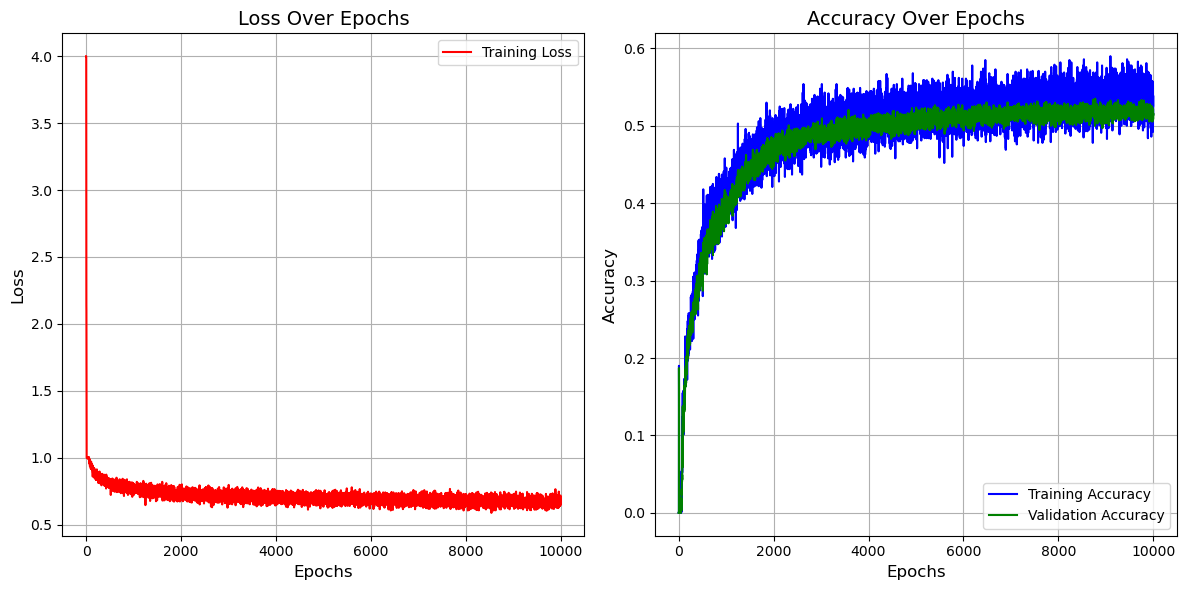

accuracy: 0.5360949612403101


In [10]:
# Initialize the neural network for regression
epochs = 10000
nn = deepNetwork(input_size=X_train.shape[1], hidden_size=10, output_size=5, typ='classify', learning_rate=3)
# Train the model
loss_hist = []
train_acc_history = []
val_acc_history = []
for iter in range(epochs):
    X_batch, y_batch = sample_batch(X_train, y_train, X_train.shape[0], 1000)
    nn.backward(X_batch, y_batch)

    y_train_pred = nn.predict(X_batch)
    y_val_pred = nn.predict(X_val)

    loss_hist.append(nn.compute_loss(y_batch, y_train_pred))
    train_acc_history.append(np.all(y_batch==y_train_pred,axis=1).mean())
    val_acc_history.append(np.all(y_val==y_val_pred,axis=1).mean())
    

plot_training_history(epochs, loss_hist, train_acc_history, val_acc_history)

y_test_pred = nn.predict(X_test)
print(f'accuracy: {np.all(y_test_pred==y_test,axis=1).mean()}')


In [11]:
y_test_pred = nn.predict(X_test)
print(f'accuracy: {np.all(y_test_pred==y_test,axis=1).mean()}')

accuracy: 0.5360949612403101


# ب

تبدیل آرایه های نامپای به تنسور های پایتورچ

In [12]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float64, device='cuda')
X_test_tensor = torch.tensor(X_test, dtype=torch.float64, device='cuda')
X_val_tensor = torch.tensor(X_val, dtype=torch.float64, device='cuda')

y_train_tensor = torch.tensor(y_train, dtype=torch.float64, device='cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.float64, device='cuda')
y_val_tensor = torch.tensor(y_val, dtype=torch.float64, device='cuda')

In [13]:

class Linear(object):

    @staticmethod
    def forward(x, w, b):
        """
        Computes the forward pass for an linear (fully-connected) layer.
        The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
        examples, where each example x[i] has shape (d_1, ..., d_k). We will
        reshape each input into a vector of dimension D = d_1 * ... * d_k, and
        then transform it to an output vector of dimension M.
        Inputs:
        - x: A tensor containing input data, of shape (N, d_1, ..., d_k)
        - w: A tensor of weights, of shape (D, M)
        - b: A tensor of biases, of shape (M,)
        Returns a tuple of:
        - out: output, of shape (N, M)
        - cache: (x, w, b)
        """
        N = x.shape[0]
        transform = x.reshape((N, -1))
        out = torch.mm(transform, w) + b
        cache = (x, w, b)
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Computes the backward pass for an linear layer.
        Inputs:
        - dout: Upstream derivative, of shape (N, M)
        - cache: Tuple of:
          - x: Input data, of shape (N, d_1, ... d_k)
          - w: Weights, of shape (D, M)
          - b: Biases, of shape (M,)
        Returns a tuple of:
        - dx: Gradient with respect to x, of shape
          (N, d1, ..., d_k)
        - dw: Gradient with respect to w, of shape (D, M)
        - db: Gradient with respect to b, of shape (M,)
        """
        x, w, b = cache
        dx, dw, db = None, None, None

        N = x.shape[0]

        # Reshape x to (N, D)
        input_vect = x.reshape((N, -1))

        # Gradient with respect to input x
        dx = dout @ w.T
        dx = dx.view(*x.shape)

        # Gradient with respect to weights w
        dw = input_vect.T @ dout

        # Gradient with respect to biases b
        db = dout.sum(dim=0)

        return dx, dw, db


class ReLU(object):

    @staticmethod
    def forward(x):
        """
        Computes the forward pass for a layer of rectified
        linear units (ReLUs).
        Input:
        - x: Input; a tensor of any shape
        Returns a tuple of:
        - out: Output, a tensor of the same shape as x
        - cache: x
        """
        out = x.clamp(min=0)
        cache = x
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Computes the backward pass for a layer of rectified
        linear units (ReLUs).
        Input:
        - dout: Upstream derivatives, of any shape
        - cache: Input x, of same shape as dout
        Returns:
        - dx: Gradient with respect to x
        """
        dx, x = None, cache
        dx = dout.clone()
        dx[x <= 0] = 0
        return dx


class Linear_ReLU(object):

    @staticmethod
    def forward(x, w, b):
        """
        Convenience layer that performs an linear transform
        followed by a ReLU.

        Inputs:
        - x: Input to the linear layer
        - w, b: Weights for the linear layer
        Returns a tuple of:
        - out: Output from the ReLU
        - cache: Object to give to the backward pass
        """
        a, fc_cache = Linear.forward(x, w, b)
        out, relu_cache = ReLU.forward(a)
        cache = (fc_cache, relu_cache)
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Backward pass for the linear-relu convenience layer
        """
        fc_cache, relu_cache = cache
        da = ReLU.backward(dout, relu_cache)
        dx, dw, db = Linear.backward(da, fc_cache)
        return dx, dw, db


class deepNetwork:
    def __init__(self,  hidden_dims, input_dim=8, num_classes=10, reg=0.0, weight_scale=1e-2, dtype=torch.float, device='cpu'):
        self.num_layers = 1 + len(hidden_dims)
        self.reg = reg
        self.dtype = dtype
        self.params = {}

        dims = [input_dim] + hidden_dims + [num_classes]
        for i in range(self.num_layers):
            self.params[f'W{i+1}'] = torch.randn(dims[i], dims[i+1], dtype=dtype, device=device) * weight_scale
            self.params[f'b{i+1}'] = torch.zeros(dims[i+1], dtype=dtype, device=device)
    
    def loss(self, X, y=None):
        """
        Compute loss and gradient for the fully-connected net.
        Inputs:
        - X: Tensor of input data of shape (N, d_1, ..., d_k)
        - y: int64 Tensor of labels, of shape (N,). y[i] gives the
          label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model
        and return:
        - scores: Tensor of shape (N, C) giving classification scores,
          where scores[i, c] is the classification score for X[i]
          and class c.
        If y is not None, then run a training-time forward and backward
        pass and return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping
          parameter names to gradients of the loss with respect to
          those parameters.
        """
        X = X.to(self.dtype)
        mode = 'test' if y is None else 'train'
        scores = None
        h_out = X
        caches = []  # a list of caches that can be popped in back-prop
        # for the first num_layer - 1, it is Linear-Relu layer
        for i in range(0, self.num_layers - 1):
            w = self.params['W' + str(i + 1)]
            b = self.params['b' + str(i + 1)]
            h_out, cache = Linear_ReLU.forward(h_out, w, b)
            caches.append(cache)

        # then is the last layer
        w = self.params['W' + str(self.num_layers)]
        b = self.params['b' + str(self.num_layers)]
        h_out, cache = Linear.forward(h_out, w, b)

        caches.append(cache)
        scores = h_out

        if mode == 'test':
            return scores
        
        loss, grads = 0.0, {}
        loss, dout = self.compute_loss(scores, y)

        # regularization term
        for i in range(self.num_layers):
            w = self.params['W' + str(i+1)]
            loss += self.reg * torch.sum(w ** 2)

        # for the last layer, it is only Linear forward
        dout, dw, db = Linear.backward(dout, caches.pop())

        grads['W' + str(self.num_layers)] = dw + 2 * self.reg * self.params['W' + str(self.num_layers)]
        grads['b' + str(self.num_layers)] = db

        for i in range(0, self.num_layers-1):
            # go to index 0
            dout, dw, db = Linear_ReLU.backward(dout, caches.pop())
            grads['W' + str(self.num_layers - 1 - i)] = dw + 2 * self.reg * self.params['W' + str(self.num_layers - 1 - i)]
            grads['b' + str(self.num_layers - 1 - i)] = db

        return loss, grads

    def compute_loss(self, scores, y):
        N, C = scores.shape  # N: number of samples, C: number of classes

        # Step 2: Compute the Mean Squared Error loss
        loss = torch.mean((scores - y) ** 2)
        
        # Step 3: Compute the gradient (dout)
        dout = (2 / N) * (scores - y)

        return loss, dout

    def predict(self, X):
        scores = self.loss(X)
        y_pred = torch.argmax(scores, dim=1)
        return y_pred



In [30]:
def nn_train(
    model: deepNetwork,
    X: torch.Tensor,
    y: torch.Tensor,
    X_val: torch.Tensor,
    y_val: torch.Tensor,
    learning_rate: float = 1e-3,
    learning_rate_decay: float = 0.95,
    reg: float = 5e-6,
    num_iters: int = 100,
    batch_size: int = 200,
    verbose: bool = False,
):
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
        X_batch, y_batch = sample_batch(X, y, num_train, batch_size)

        # Compute loss and gradients using the current minibatch
        loss, grads = model.loss(X_batch, y=y_batch)
        loss_history.append(loss.item())
        # print(loss)

        for param in model.params:
            model.params[param] -= learning_rate * grads[param]

        if verbose and it % 100 == 0:
            print("iteration %d / %d: loss %f" % (it, num_iters, loss.item()))
        
        # Every epoch, check train and val accuracy and decay learning rate.
        if it % iterations_per_epoch == 0:
            # Decay learning rate
            learning_rate *= learning_rate_decay
        
        y_train_pred = model.loss(X_batch)
        y_val_pred = model.loss(X_val)
        train_acc_history.append((y_batch == torch.round(y_train_pred)).all(dim=1).float().mean().item())
        val_acc_history.append((y_val == torch.round(y_val_pred)).all(dim=1).float().mean().item())

    return loss_history, train_acc_history, val_acc_history

### 2 layer network

iteration 0 / 2000: loss 0.199927
iteration 100 / 2000: loss 0.119770
iteration 200 / 2000: loss 0.108007
iteration 300 / 2000: loss 0.107800
iteration 400 / 2000: loss 0.105724
iteration 500 / 2000: loss 0.106394
iteration 600 / 2000: loss 0.101603
iteration 700 / 2000: loss 0.103367
iteration 800 / 2000: loss 0.105031
iteration 900 / 2000: loss 0.097704
iteration 1000 / 2000: loss 0.097913
iteration 1100 / 2000: loss 0.096522
iteration 1200 / 2000: loss 0.092520
iteration 1300 / 2000: loss 0.094547
iteration 1400 / 2000: loss 0.096477
iteration 1500 / 2000: loss 0.094949
iteration 1600 / 2000: loss 0.093963
iteration 1700 / 2000: loss 0.092385
iteration 1800 / 2000: loss 0.091879
iteration 1900 / 2000: loss 0.093494


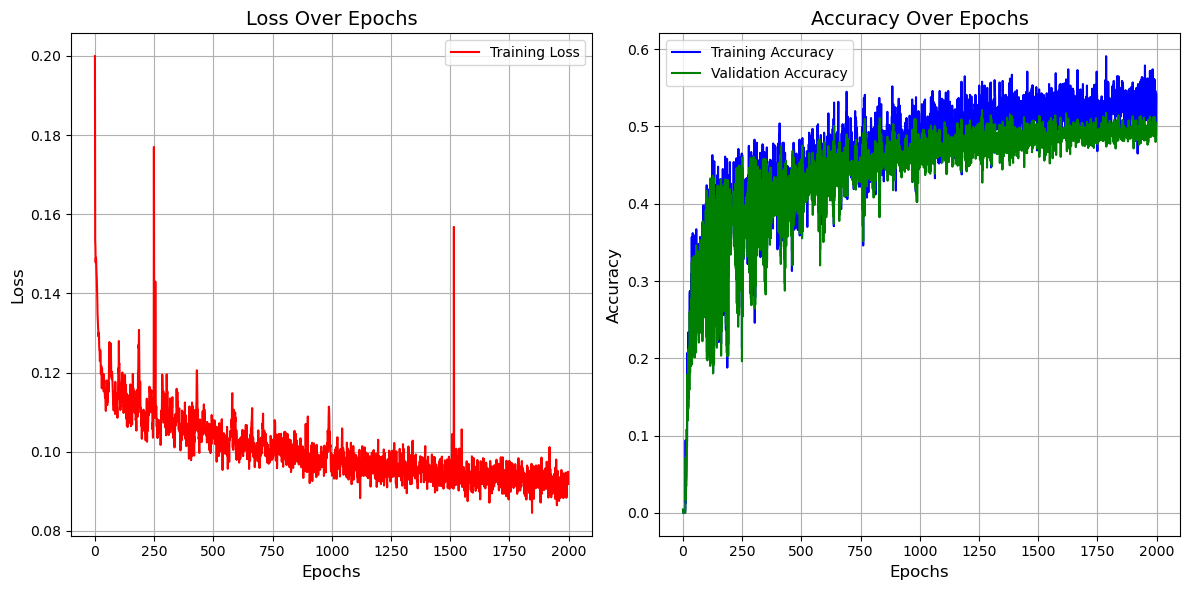

accuracy: 0.5329457521438599


In [106]:
model = deepNetwork(
        [128], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 2000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(epochs, loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
print(f'accuracy: {(y_test_tensor == torch.round(y_test_pred)).all(dim=1).float().mean().item()}')

## 3 layer network

iteration 0 / 2000: loss 0.199983
iteration 100 / 2000: loss 0.125426
iteration 200 / 2000: loss 0.114291
iteration 300 / 2000: loss 0.103343
iteration 400 / 2000: loss 0.103535
iteration 500 / 2000: loss 0.105461
iteration 600 / 2000: loss 0.099866
iteration 700 / 2000: loss 0.096819
iteration 800 / 2000: loss 0.096221
iteration 900 / 2000: loss 0.098710
iteration 1000 / 2000: loss 0.091799
iteration 1100 / 2000: loss 0.091344
iteration 1200 / 2000: loss 0.090114
iteration 1300 / 2000: loss 0.089405
iteration 1400 / 2000: loss 0.091065
iteration 1500 / 2000: loss 0.089327
iteration 1600 / 2000: loss 0.086095
iteration 1700 / 2000: loss 0.085897
iteration 1800 / 2000: loss 0.086698
iteration 1900 / 2000: loss 0.087155


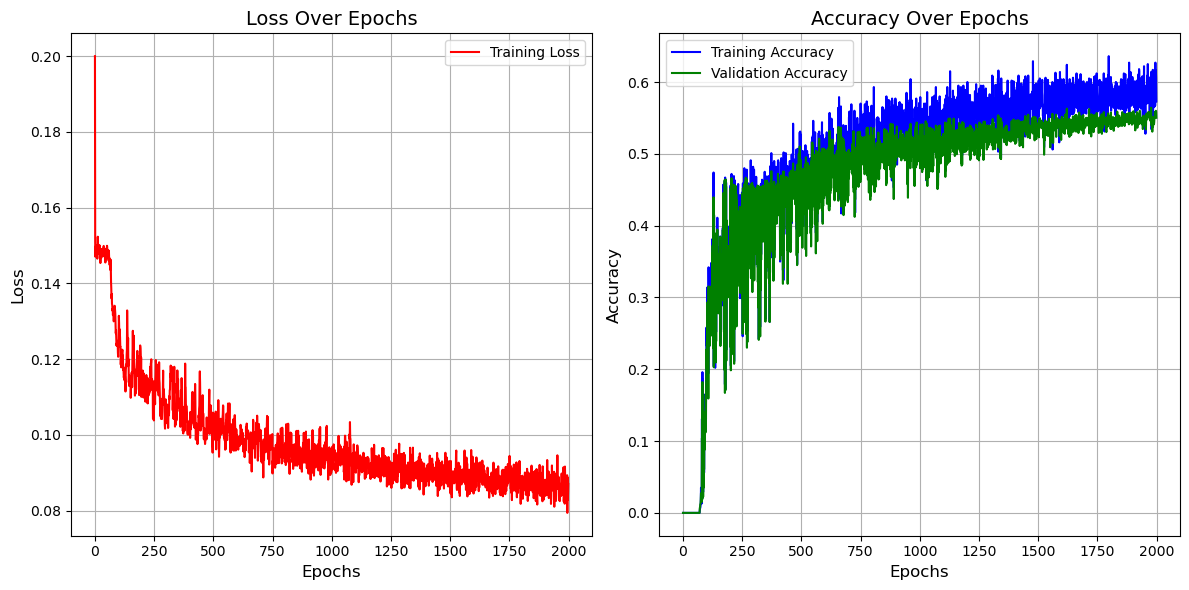

accuracy: 0.5726743936538696


In [108]:
model = deepNetwork(
        [128,64], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 2000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(epochs, loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
print(f'accuracy: {(y_test_tensor == torch.round(y_test_pred)).all(dim=1).float().mean().item()}')

## 4 layer network

iteration 0 / 5000: loss 0.200001
iteration 100 / 5000: loss 0.150757
iteration 200 / 5000: loss 0.148973
iteration 300 / 5000: loss 0.150306
iteration 400 / 5000: loss 0.147272
iteration 500 / 5000: loss 0.146481
iteration 600 / 5000: loss 0.149245
iteration 700 / 5000: loss 0.149549
iteration 800 / 5000: loss 0.148381
iteration 900 / 5000: loss 0.123034
iteration 1000 / 5000: loss 0.114629
iteration 1100 / 5000: loss 0.115614
iteration 1200 / 5000: loss 0.108257
iteration 1300 / 5000: loss 0.098546
iteration 1400 / 5000: loss 0.098465
iteration 1500 / 5000: loss 0.103515
iteration 1600 / 5000: loss 0.096104
iteration 1700 / 5000: loss 0.101734
iteration 1800 / 5000: loss 0.096443
iteration 1900 / 5000: loss 0.097990
iteration 2000 / 5000: loss 0.097124
iteration 2100 / 5000: loss 0.095584
iteration 2200 / 5000: loss 0.094017
iteration 2300 / 5000: loss 0.096651
iteration 2400 / 5000: loss 0.093891
iteration 2500 / 5000: loss 0.094578
iteration 2600 / 5000: loss 0.098474
iteration 270

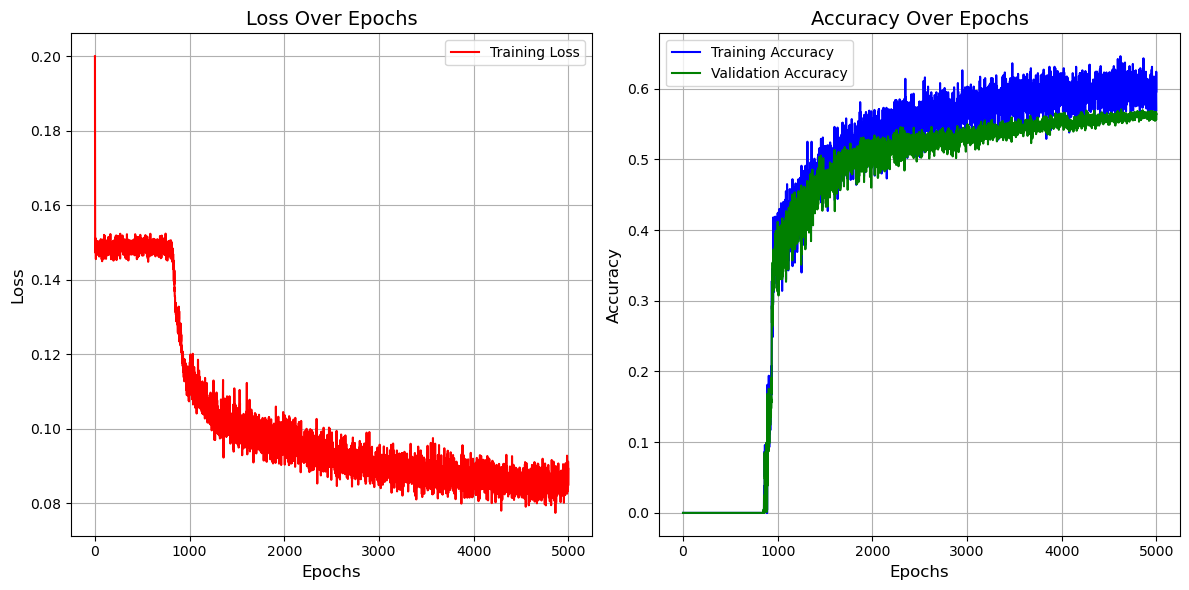

accuracy: 0.5847868323326111


In [109]:
model = deepNetwork(
        [128,64,64], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 5000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(epochs, loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
print(f'accuracy: {(y_test_tensor == torch.round(y_test_pred)).all(dim=1).float().mean().item()}')